# Scikit-Learn Library for Machine Learning
_Using Scikit-Learn library for building machine learning models._

## Steps for Building Machine Learning Models

### Loading Data Set
_The dataset being used here contains the examples of advertisement spends across multiple channels such as Radio, TV, and Newspaper, and the corresponding sales revenue generated at different time periods. In this regression task, a regression model was built for predicting future sales using spends on different advertisement channels._

In [1]:
# Loads the data set

import pandas as pd

sales = pd.read_csv("../../Data/Advertising.csv")

In [2]:
# Views the few of rows from the data set
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Prints information about the data set
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


### Splitting Dataset into Train and Test Data Sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sales[["TV", "Radio", "Newspaper"]], sales.Sales, test_size=0.3, random_state = 42)

In [5]:
print("Count of training instances:", len(X_train))
print("Count of test instances:", len(X_test))

Count of training instances: 140
Count of test instances: 60


### Preparing Data Set
#### Standardizes the Data Set

In [6]:
from sklearn.preprocessing import StandardScaler

# Initializes the scaler
std_scaler = StandardScaler()

# Then first fits the scaler and then transforms the trainig data
X_train_scaled = std_scaler.fit_transform(X_train)

### Building Linear Regression Model with Train Dataset

In [7]:
from sklearn.linear_model import LinearRegression

# Initializes the model
lin_reg = LinearRegression()

# Fits the model to the training data
lin_reg.fit(X_train_scaled, y_train)

# Prints the model intercept and coefficients
print("Intercept: {}\nCoefficients: {}".format(lin_reg.intercept_, lin_reg.coef_))

Intercept: 14.497142857142858
Coefficients: [3.68334078 2.90625242 0.14194772]


So the estimated model equation is

$\hat {Sales} = 14.497 + 3.683 * TV + 2.906 * Radio + 0.1419 * Newspaper$

### Performs Predictions on Test Set

In [8]:
# Scales the training data set
X_test_scaled = std_scaler.transform(X_test)

predictions = lin_reg.predict(X_test_scaled)

# Shows predictions against actuals for few observations
pd.DataFrame({
    "Actual": y_test, 
    "Predicted": predictions, 
    "Residual": y_test - predictions}).head(n = 10)

,Actual,Predicted,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


### Measuring Model Performance

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculates errors on test data

rmse = mean_squared_error(y_test, predictions, squared=False)
r_squared = r2_score(y_test, predictions)

print("RMSE: {} \nR-Squared: {}".format(rmse,r_squared))

RMSE: 1.94853720434464 
R-Squared: 0.8609466508230366


The above model performance evaluation shows that model prediction has standard deviation of **1.95** and the model explains **86%** of variance in y.

## Bias-Variance Trade-off

In [10]:
import numpy as np

# First, loads a two-variable data set
curve = pd.read_csv("../../Data/curve.csv")

# Checks few observations of the data set
display(curve.head(n = 10))

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770
5,10,3.042230
6,11,-3.943845
7,14,3.115570
8,15,0.142095
9,21,-2.610555


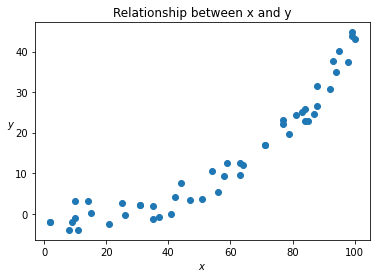

In [11]:
# Plots the data set to view relationship between the variables

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(curve.x, curve.y)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.title("Relationship between x and y")
plt.show()

As it is evident from the above plot that relation between **_x_** and **_y_** is not linear, it could be some degree of polynomial. So, let's try few polynomial form of **_x_** to verify which non-linear model fits the data best.

In [12]:
from numpy.polynomial.polynomial import polyfit, polyval

def plot_polyfit(x, y, degree):
    """
    Plots linear regression model between y and polynomial terms of x of specified degrees.
    
    Parameters
    -----------
    array_like, shape (`M`,)
        x-coordinates of the `M` sample (data) points ``(x[i], y[i])``.
    
    y : array_like, shape (`M`,)
        y-coordinates of the sample points.
        
    deg : int or 1-D array_like
        Degree(s) of the fitting polynomials.
    """
    
    # Fits the model against specified polynomial and returns the model coefficients
    poly_coefs = polyfit(x, y, deg = degree)
    
    # Evaluates the polynomial against each x
    predictions = polyval(x, poly_coefs)
    
    # Plots predictions against the actual targets
    plt.scatter(curve.x, curve.y)
    plt.plot(curve.x, predictions)
    plt.xlabel("$x$")
    plt.ylabel("$y$", rotation=0)
    plt.title("Linear Regression Model of Polynomial Degree {}".format(degree))
    plt.show()

Fitting the model with degree 1

$ y = \beta_1x_1 + \epsilon$

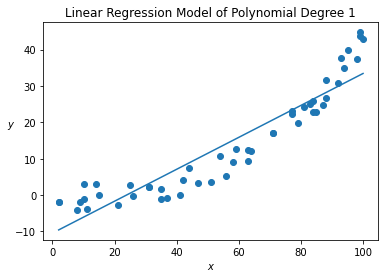

In [13]:
plot_polyfit(curve.x, curve.y, degree = 1)

Fitting the model with degree 2

$ y = \beta_1x_1 + \beta_2{x_1}^2 + \epsilon$

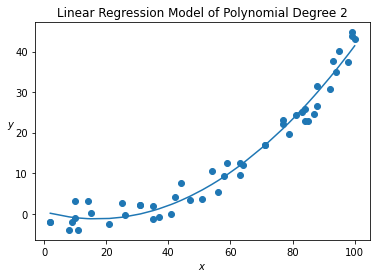

In [14]:
plot_polyfit(curve.x, curve.y, degree = 2)

Fitting the model with degree 10

$ y = \beta_1x_1 + \beta_2{x_1}^2 + \beta_3{x_1}^3 + \beta_4{x_1}^4 + \beta_5{x_1}^5 + \beta_6{x_1}^6 + \beta_7{x_1}^7 + \beta_8{x_1}^8 + \beta_9{x_1}^9 + \beta_{10}{x_1}^{10} + \epsilon$

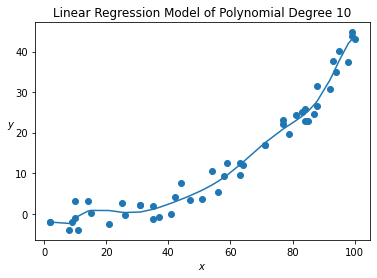

In [15]:
plot_polyfit(curve.x, curve.y, degree = 10)

The above plots shows that the model with higher polynomial terms starts trying to fit every data point in the training set. This is the case of **overﬁtting**. The model with polynomial terms degree 10 will be sensitive to any changes in training examples.

On the other hand, an **underﬁtted** model has a large error because of **high bias**, where overﬁtted model has a large error  because of **high variance**. An optimal model will be somewhere between an underﬁtted and an overﬁtted model, and will have low bias and low variance. This can be observed by comparing RMSE in training and test sets.

### Model Evaluation

To estimate the best polynimial degree, a model for every polynomial degree ranging from **1** to **15** are built. Prediction errors are then analyzed to select best polynomial degree having lowest error.

In [16]:
# Create a dataframe to store polynomial degree and errors (for both training and testing)
rmse = pd.DataFrame(columns = ["degree", "rmse_train", "rmse_test"])

# Split the dataset into training and test set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    curve.x, curve.y, test_size = 0.40, random_state = 42)

# Iterates to create and evaluate models
for i in range(1, 16):
    # Fits the model against specified polynomial and returns the model coefficients
    poly_coefs = polyfit(X_train, y_train, deg = i)
    
    # Evaluates the polynomial against each x
    predictions_train = polyval(X_train, poly_coefs)
    rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
    
    predictions_test = polyval(X_test, poly_coefs)
    rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
    
    rmse.loc[i - 1] = [i, rmse_train, rmse_test]

In [17]:
# Shows the performace in tabular form
display(rmse)

,degree,rmse_train,rmse_test
0,1.0,5.355971,5.797133
1,2.0,2.350539,2.789114
2,3.0,2.200179,2.570771
3,4.0,2.171103,2.737489
4,5.0,2.110693,2.668397
5,6.0,2.110577,2.675516
6,7.0,2.108140,2.645712
7,8.0,2.107193,2.665202
8,9.0,2.021894,2.645752
9,10.0,1.996964,2.784554


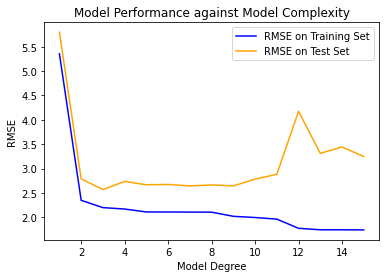

In [18]:
# Shows the performace in graphical form by plotting
# train and test errors against the model complexity

plt.plot(rmse.degree, rmse.rmse_train, label="RMSE on Training Set", color = "blue" )
plt.plot(rmse.degree, rmse.rmse_test, label="RMSE on Test Set", color = "orange" )
plt.xlabel("Model Degree")
plt.ylabel("RMSE")
plt.legend()
plt.title("Model Performance against Model Complexity")
plt.show()

Observations from the above plots are
- Training error coninued to get lower with the increase of model complexity
- Testing error is lowest with polynomial degree 3 and continued to increase thereafter

In [19]:
print("Degree of polynomial for which the testing is lowest is", 
     int(rmse.loc[rmse.rmse_test.argmin()].degree))

Degree of polynomial for which the testing is lowest is 3
